# Predicting Pakistan Stock Exchange(PSX) stock movement using Random Forest Prediction Model and technical indicators (Cont. data)

## Importing Libraries

In [95]:
import pandas as pd
#import pandas_datareader.data as web
import datetime
import seaborn as sns
import numpy as np
from talib.abstract import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


### Research Data used in this experiment consists of 3 stocks
#### 1- Attock Cement Pakistan Limited
#### 2- Lucky Cement Limited 
#### 3- Fecto Cement Limited

In [96]:
stock = ['ACPL','FECTC','LUCK']


## Loading of datasets

In [97]:
stocks = {}
indices = {}
for i in stock:
    stocks[i] = pd.read_csv('Datasets/Stocks/'+i+'.csv')

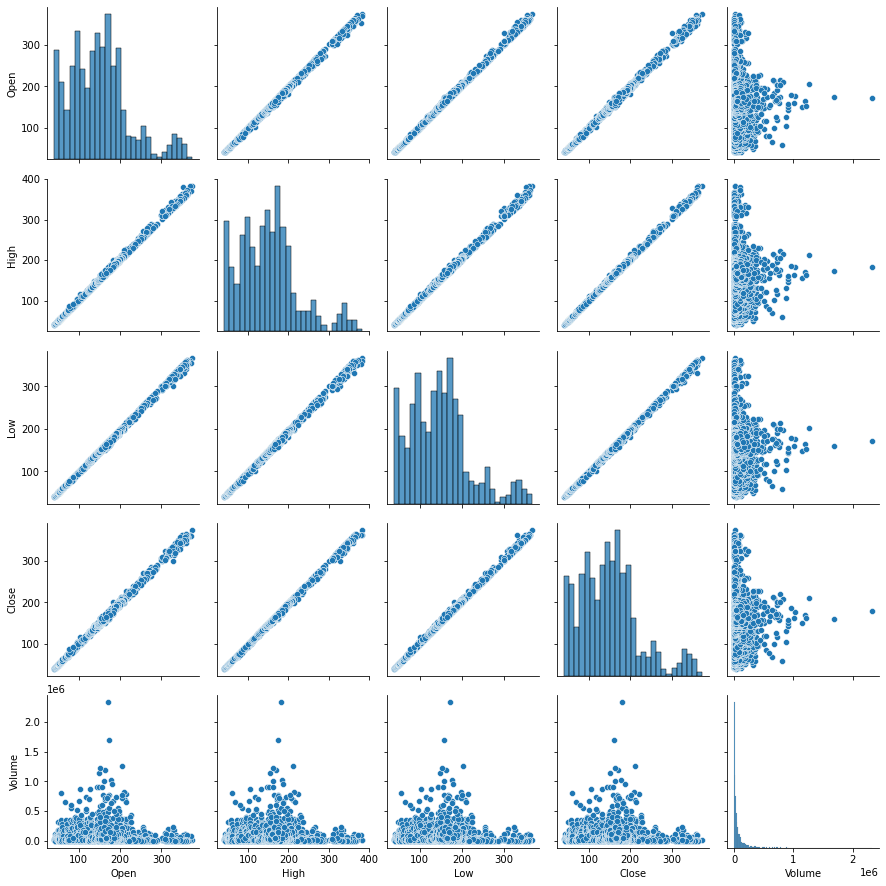

In [99]:
sns.pairplot(stocks['ACPL'])

In [56]:
stocks['ACPL'].head()

,Symbol,Date,Open,High,Low,Close,Volume
0,ACPL,03-Jan-2011,62.01,62.98,61.01,62.29,13541
1,ACPL,04-Jan-2011,62.50,62.79,62.00,62.50,5224
2,ACPL,05-Jan-2011,62.45,62.60,62.01,62.02,2394
3,ACPL,06-Jan-2011,62.50,62.95,61.71,62.68,19617
4,ACPL,07-Jan-2011,62.00,62.90,62.00,62.81,5626


In [57]:
stocks['FECTC'].head()

,Symbol,Date,Open,High,Low,Close,Volume
0,FECTC,04-Jan-2011,7.30,7.30,7.20,7.20,2010
1,FECTC,05-Jan-2011,7.00,7.00,7.00,7.00,1090
2,FECTC,06-Jan-2011,7.00,7.19,7.00,7.10,17500
3,FECTC,10-Jan-2011,7.05,7.05,7.00,7.01,2000
4,FECTC,11-Jan-2011,7.35,7.35,7.35,7.35,100


In [58]:
stocks['LUCK'].head()

,Symbol,Date,Open,High,Low,Close,Volume
0,LUCK,03-Jan-2011,75.06,75.45,73.0,73.31,1640080
1,LUCK,04-Jan-2011,73.33,75.75,73.1,75.57,3054869
2,LUCK,05-Jan-2011,74.61,76.25,74.6,75.11,1679231
3,LUCK,06-Jan-2011,75.70,76.10,74.8,75.05,1164903
4,LUCK,07-Jan-2011,75.50,75.60,74.9,75.13,866665


In [59]:
len(stocks['ACPL'])

2514

In [60]:
len(stocks['FECTC'])

2404

In [61]:
len(stocks['LUCK'])

2538

In [62]:
for i,j in enumerate(stocks):
    stocks[j].columns = [s.lower() for s in stocks[j].columns]
    stocks[j].volume = stocks[j].volume.apply(lambda x: float(x))
for i,j in enumerate(indices):
    indices[j].columns = [s.lower() for s in indices[j].columns]
    indices[j].volume = indices[j].volume.apply(lambda x: float(x))

## Calculation of Technical Indicators 

In [63]:
def get_stocks_indicators(stocks, period):
    stocks_indicators = {}
    for i in stocks:
        features = pd.DataFrame(SMA(stocks[i], timeperiod=10))
        features.columns = ['sma_10']
        features['mom_10'] = pd.DataFrame(MOM(stocks[i],10))
        features['wma_10'] = pd.DataFrame(WMA(stocks[i],10))
        features = pd.concat([features,STOCHF(stocks[i], 
                                          fastk_period=14, 
                                          fastd_period=3)],
                             axis=1)
        features['macd'] = pd.DataFrame(MACD(stocks[i], fastperiod=12, slowperiod=26)['macd'])
        features['rsi'] = pd.DataFrame(RSI(stocks[i], timeperiod=14))
        features['willr'] = pd.DataFrame(WILLR(stocks[i], timeperiod=14))
        features['cci'] = pd.DataFrame(CCI(stocks[i], timeperiod=14))
        features['adosc'] = pd.DataFrame(ADOSC(stocks[i], fastperiod=3, slowperiod=10))
        features['pct_change'] = ROC(stocks[i], timeperiod=period)
        features['pct_change'] = features['pct_change'].shift(-period)
        features['pct_change'] = features['pct_change'].apply(lambda x: '1' if x > 0 else '0' if x <= 0 else np.nan)
        features = features.dropna()
        #features = features.iloc[np.where(features.index=='1998-5-5')[0][0]:np.where(features.index=='2015-5-5')[0][0]]
        stocks_indicators[i] = features
    return stocks_indicators

In [64]:
stocks_indicators = get_stocks_indicators(stocks, 1)

In [65]:
stocks_indicators['ACPL'].head()

,sma_10,mom_10,wma_10,fastk,fastd,macd,rsi,willr,cci,adosc,pct_change
33,51.250,-1.00,51.071273,37.083333,26.673435,-3.209288,25.173727,-62.916667,-51.815589,-34929.474436,0
34,51.176,-0.74,51.073091,45.862069,34.117654,-3.046644,25.138465,-54.137931,-66.848444,-28110.421528,0
35,51.062,-1.14,50.948364,37.500000,40.148467,-2.945922,22.522409,-62.500000,-118.913121,-22195.957820,1
36,51.018,-0.44,50.951636,57.882883,47.081651,-2.786372,28.649460,-42.117117,-79.844337,-15927.256282,1
37,50.965,-0.53,50.966545,58.333333,51.238739,-2.628019,28.854852,-41.666667,-48.740930,-10018.950677,0


In [66]:
stocks_indicators['FECTC'].head()

,sma_10,mom_10,wma_10,fastk,fastd,macd,rsi,willr,cci,adosc,pct_change
33,6.942,-0.25,6.905273,41.176471,33.137255,-0.087021,49.220609,-58.823529,-26.791277,-27828.273557,0
34,6.942,0.00,6.915818,41.176471,36.274510,-0.077496,49.220609,-58.823529,35.979077,-23867.692585,0
35,6.942,0.00,6.926364,41.176471,41.176471,-0.069150,49.220609,-58.823529,-52.383333,-20076.710134,0
36,6.942,0.00,6.936909,41.176471,41.176471,-0.061823,49.220609,-58.823529,-13.053613,-16700.698210,0
37,6.878,-0.64,6.929273,35.294118,39.215686,-0.063355,47.250913,-64.705882,-0.416419,-14159.629859,1


In [67]:
stocks_indicators['LUCK'].head()

,sma_10,mom_10,wma_10,fastk,fastd,macd,rsi,willr,cci,adosc,pct_change
33,69.384,-3.89,68.612727,17.513514,20.504505,-2.035539,37.075423,-82.486486,-108.853639,-2.597303e+05,0
34,68.981,-4.03,68.246545,22.276423,16.975024,-2.045752,36.330196,-77.723577,-110.882252,-2.308807e+05,0
35,68.416,-5.65,67.706364,2.922078,14.237338,-2.138929,32.502777,-97.077922,-127.845584,-5.563232e+05,0
36,67.737,-6.79,67.012545,11.390887,12.196463,-2.300035,29.081980,-88.609113,-150.562830,-7.656270e+05,0
37,66.985,-7.52,66.178545,3.598691,5.970552,-2.515716,26.046110,-96.401309,-166.004806,-1.146300e+06,0


## Calculation of weight table to depict increase and decrease in Stock Points 

In [90]:
def weighs_table(stocks, period):
    stocks_table = pd.DataFrame()
    indices_table = pd.DataFrame()
    for j in stocks:
        weighs_1 = []
        for i in range(1,period+1):
            stocks_indicators = get_stocks_indicators(stocks, i)
            weighs_1.append((len(stocks_indicators[j][stocks_indicators[j]['pct_change']=='1'])/\
                            float(len(stocks_indicators[j])))*100)
        stocks_table = pd.concat([stocks_table, pd.DataFrame(weighs_1)], axis=1)
    return stocks_table

In [93]:
stocks_table = weighs_table(stocks, 20)

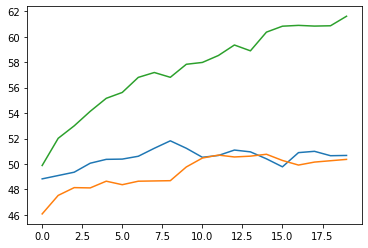

In [92]:
plt.plot(stocks_table)

# Implementation of Random Forest Classifier Algorithm

In [73]:
def avg_score(x_train, y_train,x_test,y_test,trees):
    accuracy = []
    f1 = []
    rf_model = RandomForestClassifier(trees)
    for i in range(5):
        rf_model.fit(x_train,y_train)
        accuracy.append(rf_model.score(x_test,y_test))
        f1.append(f1_score(y_test,rf_model.predict(x_test), pos_label='1'))
    avg_accuracy = sum(accuracy)/len(accuracy)
    avg_f1 = sum(f1)/len(f1)
    return avg_accuracy, avg_f1

## Using Random Forest Algorithm for prediction of stock and stock price movement 

In [62]:
def stocks_accuracy(stocks, trees, period):
    table_accuracy = pd.DataFrame()
    table_f1 = pd.DataFrame()
    for j in stocks:
        accuracy_values = []
        f1_values = []
        for i in range(1,period+1):
            stocks_indicators = get_stocks_indicators(stocks, i)
            train, test = train_test_split(stocks_indicators[j])
            accuracy, f1 = avg_score(train.iloc[:,:-1],train.iloc[:,-1],test.iloc[:,:-1],test.iloc[:,-1],trees)
            accuracy_values.append(accuracy)
            f1_values.append(f1)
        table_accuracy = pd.concat([table_accuracy, pd.DataFrame({j : accuracy_values})], axis=1)
        table_f1 = pd.concat([table_f1, pd.DataFrame({j : f1_values})], axis=1)
    table_accuracy.index = range(1,period+1)
    table_f1.index = range(1,period+1)
    return table_accuracy, table_f1

def indices_accuracy(indices, trees, period):
    table_accuracy = pd.DataFrame()
    table_f1 = pd.DataFrame()
    for j in indices:
        accuracy_values = []
        f1_values = []
        for i in range(1,period+1):
            indices_indicators = get_indices_indicators(indices, i)
            train, test = train_test_split(indices_indicators[j])
            accuracy, f1 = avg_score(train.iloc[:,:-1],train.iloc[:,-1],test.iloc[:,:-1],test.iloc[:,-1],trees)
            accuracy_values.append(accuracy)
            f1_values.append(f1)
        table_accuracy = pd.concat([table_accuracy, pd.DataFrame({j : accuracy_values})], axis=1)
        table_f1 = pd.concat([table_f1, pd.DataFrame({j : f1_values})], axis=1)
    table_accuracy.index = range(1,period+1)
    table_f1.index = range(1,period+1)
    return table_accuracy, table_f1

In [63]:
stocks_accuracy_table, stocks_f1_table = stocks_accuracy(stocks, 300, 20)

In [64]:
indices_accuracy_table, indices_f1_table = indices_accuracy(indices, 500, 20)

## Graphical Representation of Accuracy and F1 scores of the used algorithm 

In [70]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Average Score')

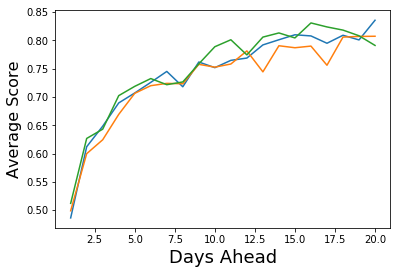

In [71]:
plt.plot(stocks_accuracy_table)
fig.suptitle('Accuracy Scores', fontsize=20)
plt.xlabel('Days Ahead', fontsize=18)
plt.ylabel('Average Score', fontsize=16)

Text(0, 0.5, 'Average Score')

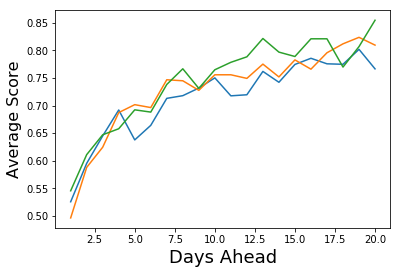

In [72]:
plt.plot(indices_accuracy_table)
fig.suptitle('Accuracy Scores', fontsize=20)
plt.xlabel('Days Ahead', fontsize=18)
plt.ylabel('Average Score', fontsize=16)

Text(0, 0.5, 'Average Score')

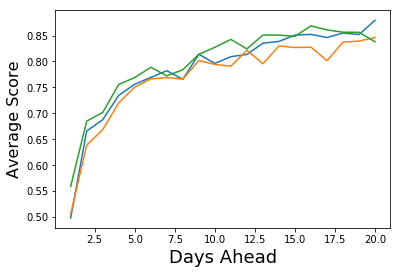

In [73]:
plt.plot(stocks_f1_table)
fig.suptitle('Accuracy Scores', fontsize=20)
plt.xlabel('Days Ahead', fontsize=18)
plt.ylabel('Average Score', fontsize=16)

Text(0, 0.5, 'Average Score')

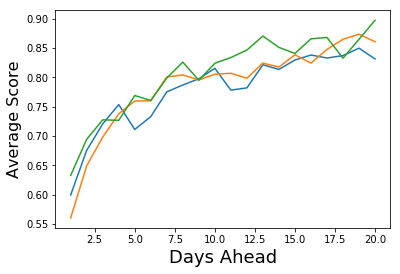

In [74]:
plt.plot(indices_f1_table)
fig.suptitle('Accuracy Scores', fontsize=20)
plt.xlabel('Days Ahead', fontsize=18)
plt.ylabel('Average Score', fontsize=16)

In [75]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

## Tabular Representation of our final calculated results 

In [76]:
stocks_accuracy_table.style.apply(highlight_max, axis=0)

,AMZN,GOOG,AAPL
1,0.486257,0.49883,0.511988
2,0.611988,0.599708,0.626608
3,0.648246,0.624269,0.642982
4,0.689312,0.669107,0.702196
5,0.706881,0.706296,0.718594
6,0.725622,0.719766,0.732357
7,0.744949,0.723865,0.721523
8,0.717889,0.723167,0.726393
9,0.761584,0.757478,0.758358
10,0.751613,0.752493,0.788563


In [77]:
indices_accuracy_table.style.apply(highlight_max, axis=0)

,GSPC,DJI,NDX
1,0.525731,0.496491,0.545614
2,0.595322,0.588012,0.611111
3,0.645029,0.624561,0.647076
4,0.691947,0.687262,0.65798
5,0.637775,0.701611,0.69224
6,0.664129,0.69634,0.688141
7,0.713031,0.746706,0.738214
8,0.717889,0.744868,0.766569
9,0.731672,0.727566,0.731085
10,0.750147,0.755718,0.764809


In [78]:
stocks_f1_table.style.apply(highlight_max, axis=0)

,AMZN,GOOG,AAPL
1,0.498397,0.506049,0.559059
2,0.665974,0.63864,0.684933
3,0.687742,0.66858,0.701666
4,0.734575,0.720286,0.755695
5,0.756147,0.750585,0.769031
6,0.769054,0.766408,0.788715
7,0.782205,0.768926,0.772191
8,0.765601,0.765973,0.784052
9,0.813915,0.80182,0.813659
10,0.796242,0.794141,0.827222


In [79]:
indices_f1_table.style.apply(highlight_max, axis=0)

,GSPC,DJI,NDX
1,0.599298,0.560229,0.63261
2,0.675367,0.649046,0.69422
3,0.720396,0.69802,0.72734
4,0.753398,0.737591,0.726561
5,0.710915,0.759499,0.768754
6,0.732822,0.759789,0.760293
7,0.775011,0.80046,0.798649
8,0.786776,0.803791,0.825746
9,0.797253,0.795334,0.79488
10,0.815183,0.805056,0.823747
